In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv


In [0]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [61]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

 #Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
#regressor.add(activation='sigmoid')

# Compiling the RNN
regressor.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#print(regressor.summary())




#regressor.compile(optimizer= 'adam', loss = 'accuracy')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 120, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Epoch 1/120
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0725 - acc: 0.0017
Epoch 2/120
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0062 - acc: 0.0017
Epoch 3/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0045 - acc: 0.0017
Epoch 4/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0044 - acc: 0.0017
Epoch 5/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0041 - acc: 0.0017
Epoch 6/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0040 - acc: 0.0017
Epoch 7/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0043 - acc: 0.0017
Epoch 8/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0041 - acc: 0.0017
Epoch 9/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0035 - acc: 0.0017
Epoch 10/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0037 - acc: 0.0017

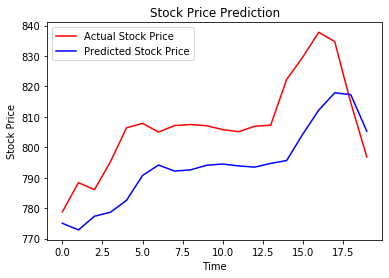

In [62]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
